<a href="https://colab.research.google.com/github/SamarthRaina19/Repository-1/blob/main/Stats_5(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original DataFrame:
   Feature 1  Feature 2  Feature 3
0         10        100          1
1         20        200          2
2         30        300          3
3         40        400          4
4         50        500          5

Normalized DataFrame:
   Feature 1  Feature 2  Feature 3
0       0.00       0.00       0.00
1       0.25       0.25       0.25
2       0.50       0.50       0.50
3       0.75       0.75       0.75
4       1.00       1.00       1.00


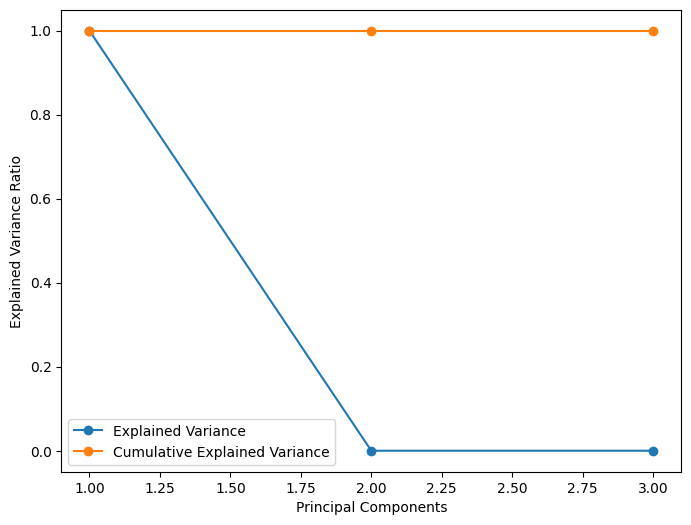

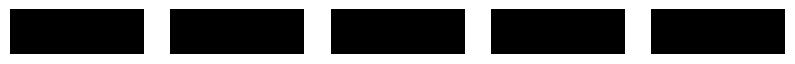

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


data = {
    'Feature 1': [10, 20, 30, 40, 50],
    'Feature 2': [100, 200, 300, 400, 500],
    'Feature 3': [1, 2, 3, 4, 5]
}
df = pd.DataFrame(data)


scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

print("Original DataFrame:")
print(df)
print("\nNormalized DataFrame:")
print(normalized_df)


feat_cols = df.columns

pca = PCA(n_components=3)
pca_result = pca.fit_transform(normalized_df[feat_cols].values)


plt.figure(figsize=(8, 6))
plt.plot(range(1, 4), pca.explained_variance_ratio_, marker='o', label='Explained Variance')
plt.plot(range(1, 4), np.cumsum(pca.explained_variance_ratio_), marker='o', label='Cumulative Explained Variance')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()


rndperm = np.random.permutation(normalized_df.shape[0])

fig = plt.figure(figsize=(10, 5))
plt.gray()

for i in range(0, 5):
    ax = fig.add_subplot(1, 5, i + 1)
    data_to_plot = normalized_df.loc[rndperm[i]].values.reshape(1, -1)
    ax.matshow(data_to_plot.astype(float), cmap='gray')
    ax.axis('off')
plt.show()
